## Armaan Jain

# Medical Insurance Price Prediction

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
df=pd.read_csv("insurance.csv")     

In [5]:
df.shape     

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


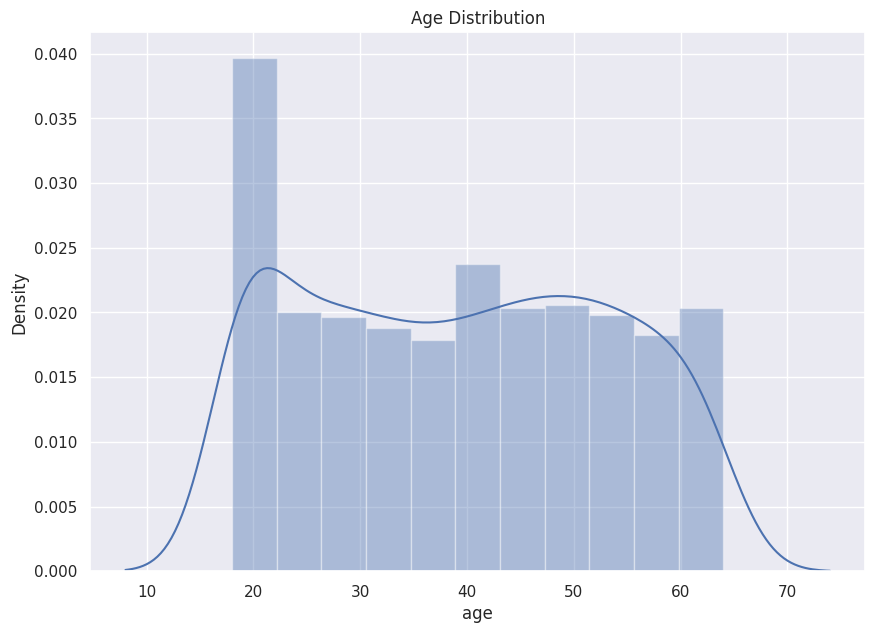

In [9]:
sns.set()
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()     

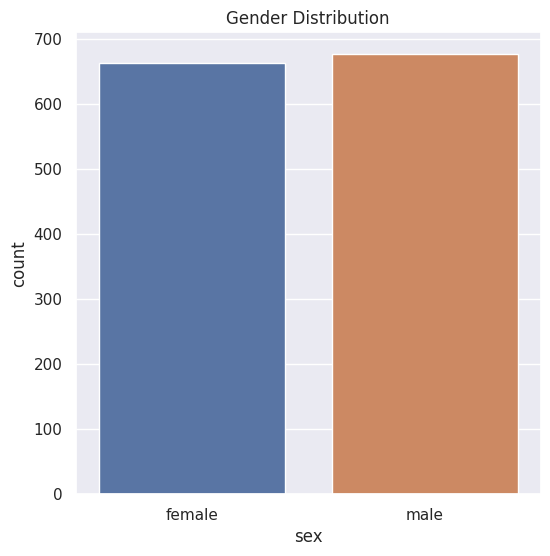

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

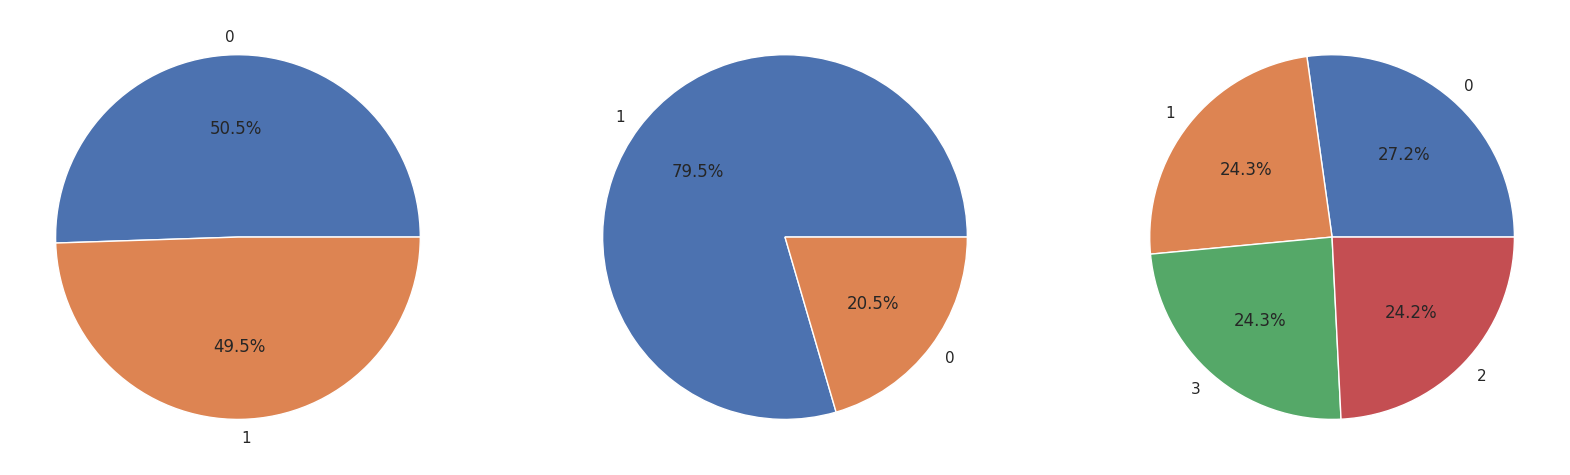

In [34]:
features = ['sex', 'smoker', 'region']
  
plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)
  
    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')
  
plt.show()

In [11]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

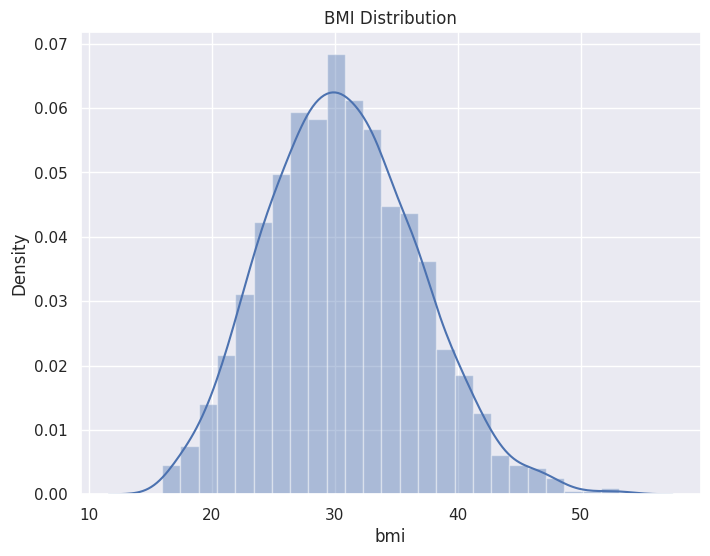

In [12]:
plt.figure(figsize=(8,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

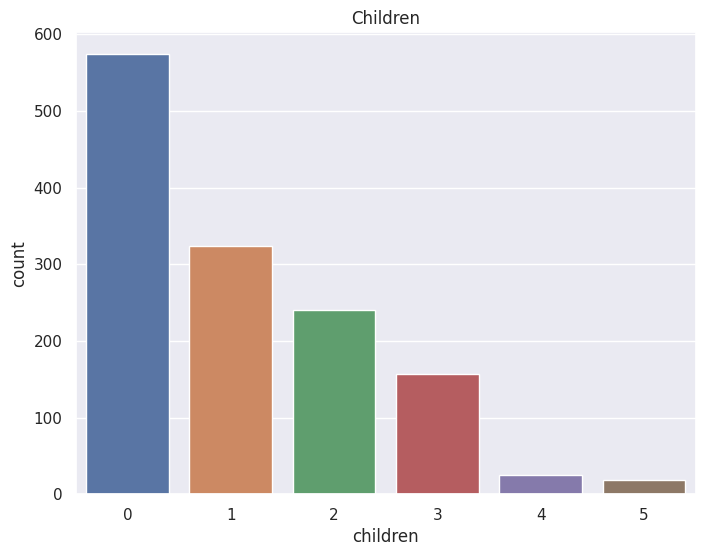

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()     

In [14]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

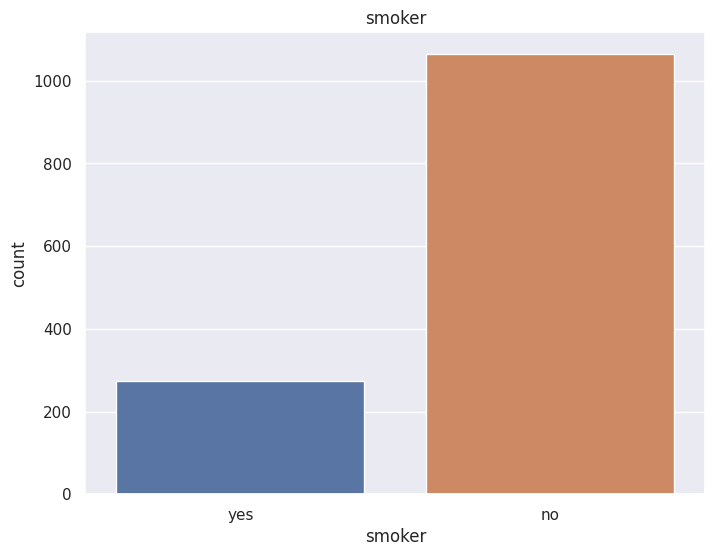

In [15]:
plt.figure(figsize=(8,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker')
plt.show()

In [16]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

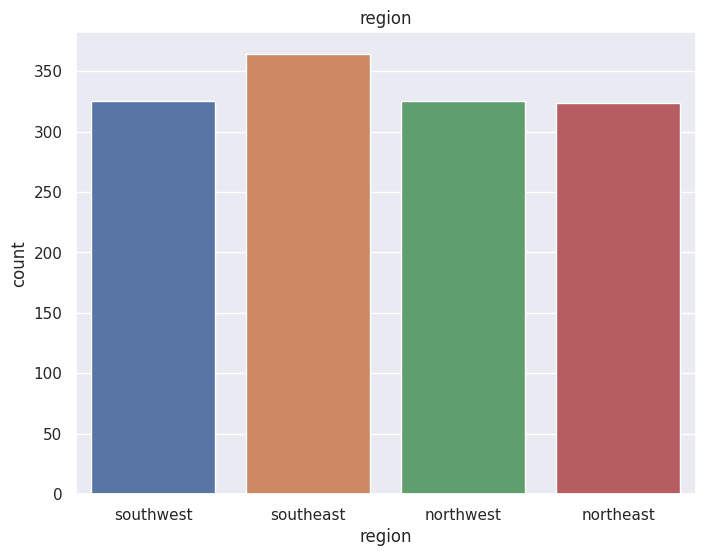

In [17]:
plt.figure(figsize=(8,6))
sns.countplot(x='region', data=df)
plt.title('region')
plt.show()

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

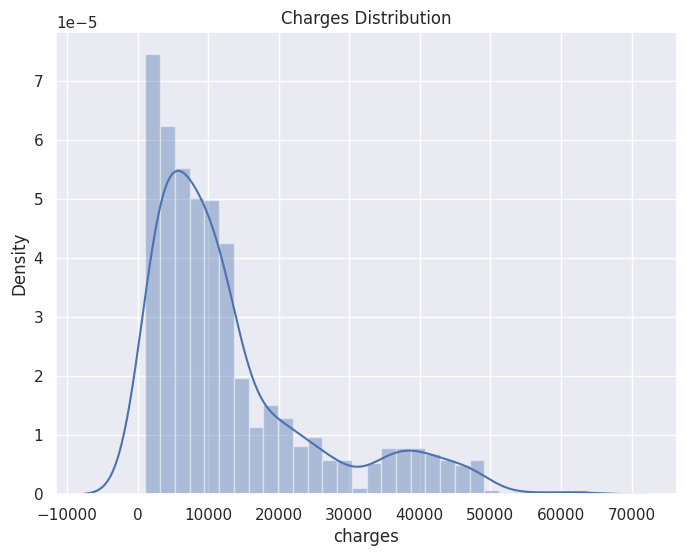

In [19]:
plt.figure(figsize=(8,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [20]:
df.replace({'sex':{'male':0,'female':1}}, inplace=True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [21]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']     

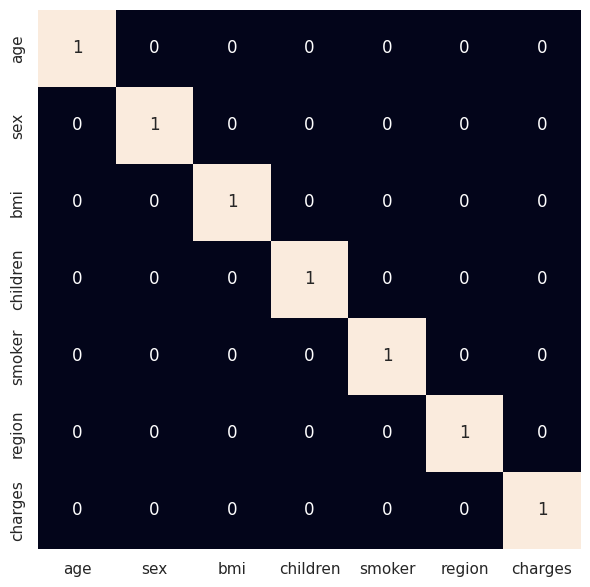

In [36]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(Y)     

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (936, 6) (402, 6)


In [26]:
regressor = LinearRegression()

In [27]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [28]:
training_data_prediction =regressor.predict(X_train)

In [29]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7415730843556845


In [30]:
test_data_prediction =regressor.predict(X_test)

In [31]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7661186068101191


In [32]:
# 31,female,25.74,0,no,southeast,3756.6216
input_data = (31,1,25.74,0,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)



In [33]:
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost is USD ', prediction[0])     

[3885.63835645]
The insurance cost is USD  3885.6383564502376
